In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\software\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_path = r'../../../DataSet/E Commerce Dataset.xlsx'
df_origin = pd.read_excel(data_path, sheet_name='E Comm')
df_origin.head(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [4]:
#learning the dataset
df = df_origin.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.duplicated().sum()

0

In [12]:
#process the null
null_col_list = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i,df[i].dtypes, df[i].isnull().sum())
        null_col_list.append(i)
        print()

Tenure float64 264

WarehouseToHome float64 251

HourSpendOnApp float64 255

OrderAmountHikeFromlastYear float64 265

CouponUsed float64 256

OrderCount float64 258

DaySinceLastOrder float64 307



In [13]:
#so , all null is float, check the distribution
df[null_col_list].describe().transpose()

count       mean       std   min   25%   50%  \
Tenure                       5366.0  10.189899  8.557241   0.0   2.0   9.0   
WarehouseToHome              5379.0  15.639896  8.531475   5.0   9.0  14.0   
HourSpendOnApp               5375.0   2.931535  0.721926   0.0   2.0   3.0   
OrderAmountHikeFromlastYear  5365.0  15.707922  3.675485  11.0  13.0  15.0   
CouponUsed                   5374.0   1.751023  1.894621   0.0   1.0   1.0   
OrderCount                   5372.0   3.008004  2.939680   1.0   1.0   2.0   
DaySinceLastOrder            5323.0   4.543491  3.654433   0.0   2.0   3.0   

                              75%    max  
Tenure                       16.0   61.0  
WarehouseToHome              20.0  127.0  
HourSpendOnApp                3.0    5.0  
OrderAmountHikeFromlastYear  18.0   26.0  
CouponUsed                    2.0   16.0  
OrderCount                    3.0   16.0  
DaySinceLastOrder             7.0   46.0

In [14]:
#mean is close to median, so I use the median to fill the null
for col in null_col_list:
    df[col].fillna(df[col].median(), inplace=True)

In [24]:
#split the cate and num col
# df = df.drop('CustomerID', axis=1) 
#update the cate col
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

cate_col = [i for i in df.columns if df[i].dtypes == 'object']
num_col = [i for i in df.columns if i not in cate_col]

print(cate_col)
print(num_col)

['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [25]:
# check the cate and num col
for col in cate_col:
    print(col)
    print(df[col].value_counts())
    print()

Churn
0    4682
1     948
Name: Churn, dtype: int64

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

CityTier
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Gender
Male      3384
Female    2246
Name: Gender, dtype: int64

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



Text(0, 0.5, 'Values')

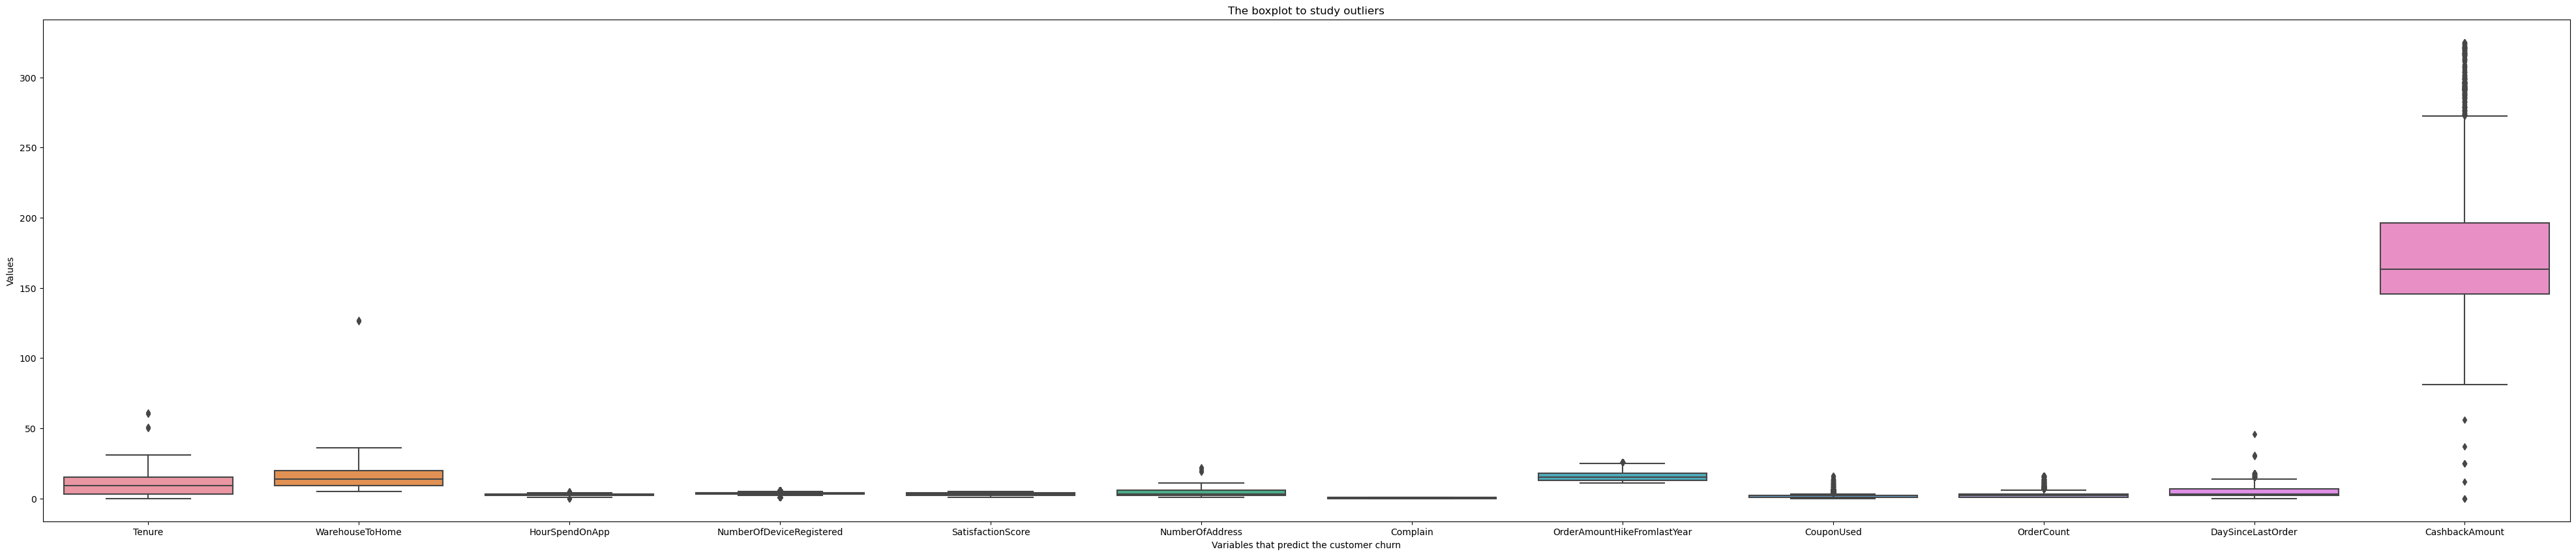

In [26]:
#check the num col
plt.figure(figsize=(50,10))
sns.boxplot(data=df[num_col])
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

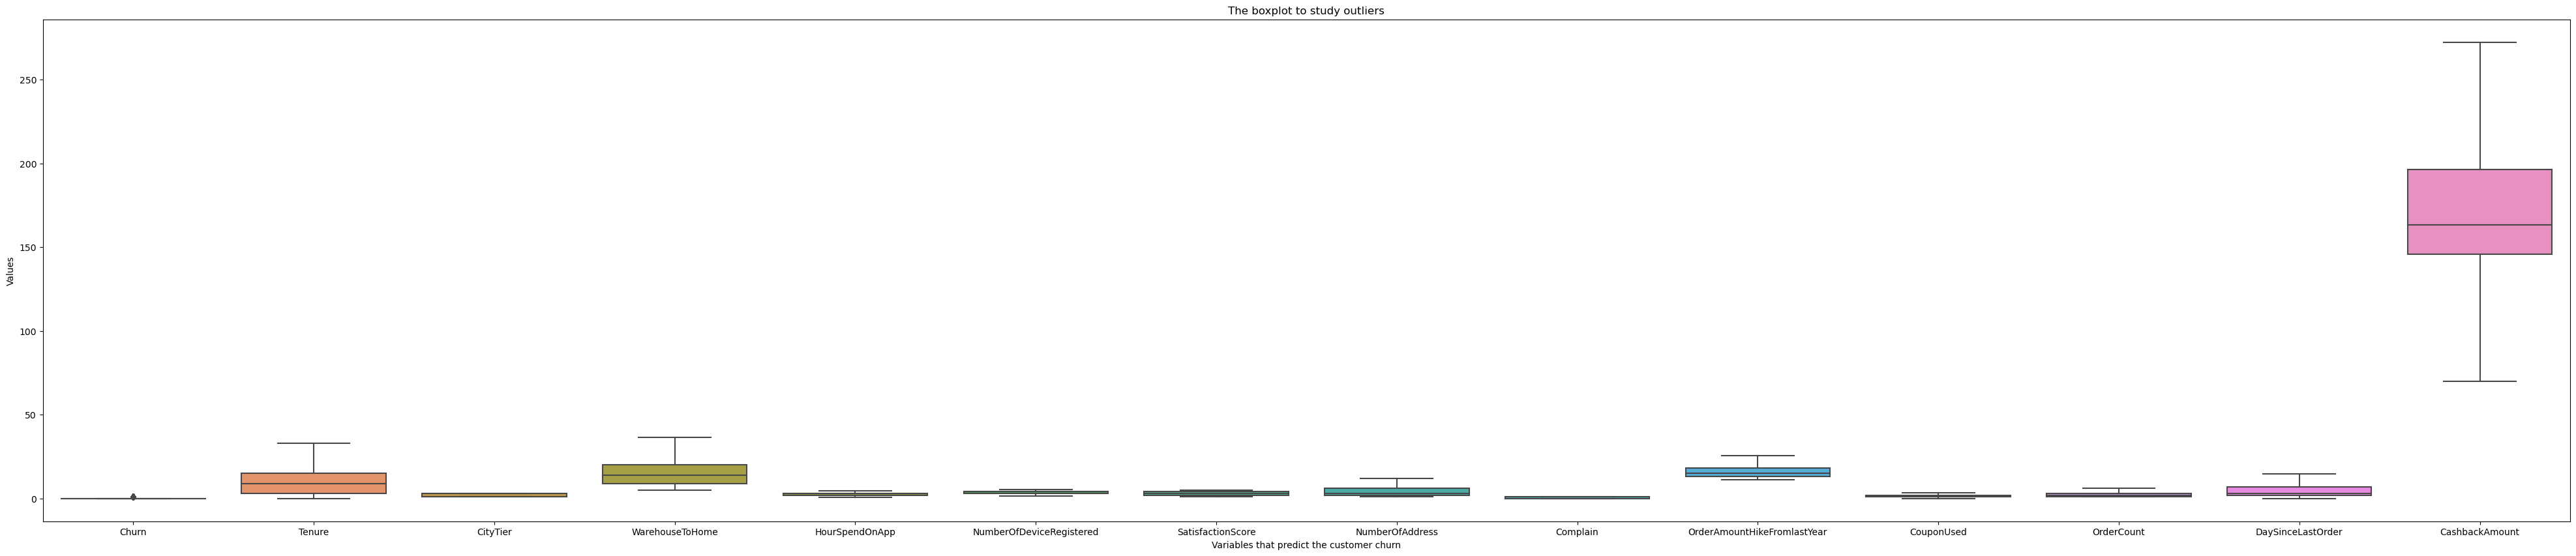

In [27]:
#Here we can see that there are quite a lot of outliers in almost all of the variables. Lets treat these outliers
#normally, I will set the outlier as bundary

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

for column in num_col:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])
    
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [28]:
#feature engniring
#add new features
df['avg_cashbk_per_order'] = df['CashbackAmount'] / df['OrderCount']

# Percentage of customer churn
Churn_perc = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'].count()),2)
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 16.84 %


array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'WarehouseToHome'}>,
        <AxesSubplot:title={'center':'HourSpendOnApp'}>],
       [<AxesSubplot:title={'center':'NumberOfDeviceRegistered'}>,
        <AxesSubplot:title={'center':'SatisfactionScore'}>,
        <AxesSubplot:title={'center':'NumberOfAddress'}>],
       [<AxesSubplot:title={'center':'Complain'}>,
        <AxesSubplot:title={'center':'OrderAmountHikeFromlastYear'}>,
        <AxesSubplot:title={'center':'CouponUsed'}>],
       [<AxesSubplot:title={'center':'OrderCount'}>,
        <AxesSubplot:title={'center':'DaySinceLastOrder'}>,
        <AxesSubplot:title={'center':'CashbackAmount'}>]], dtype=object)

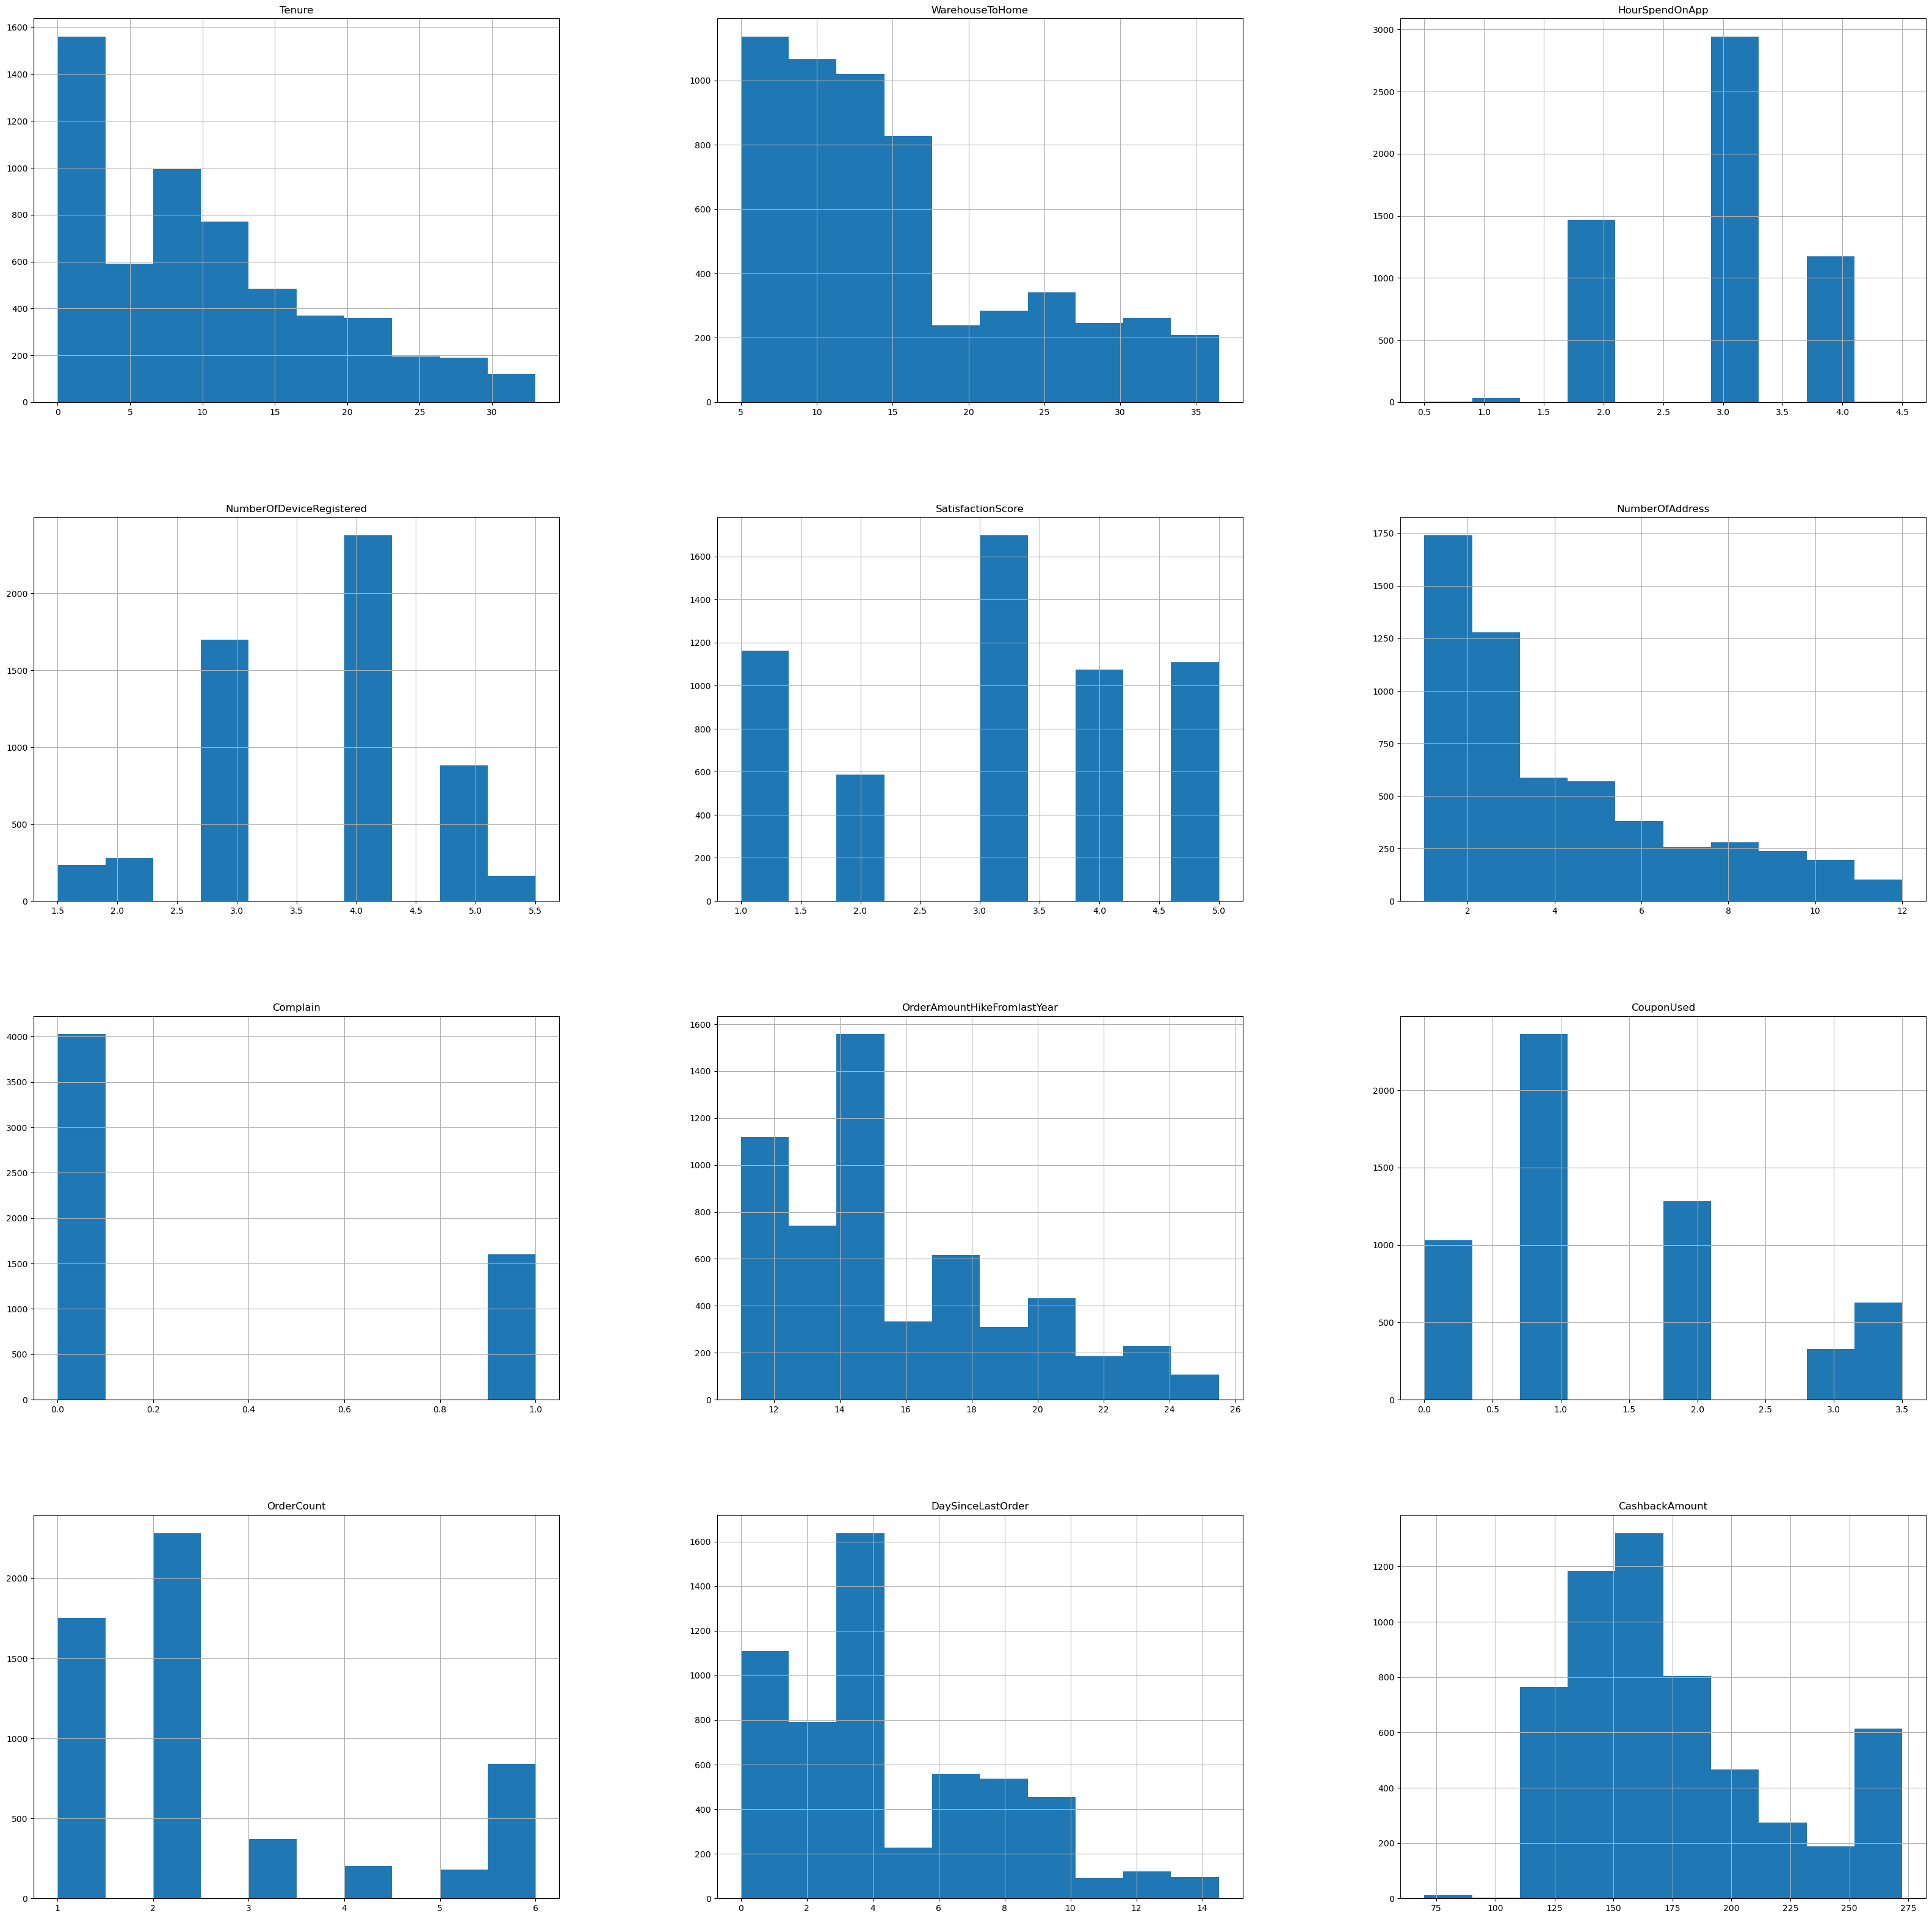

In [29]:
#Exploratory Data Analysis
df[num_col].hist(figsize=(40,40))

D:\software\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\software\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\software\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

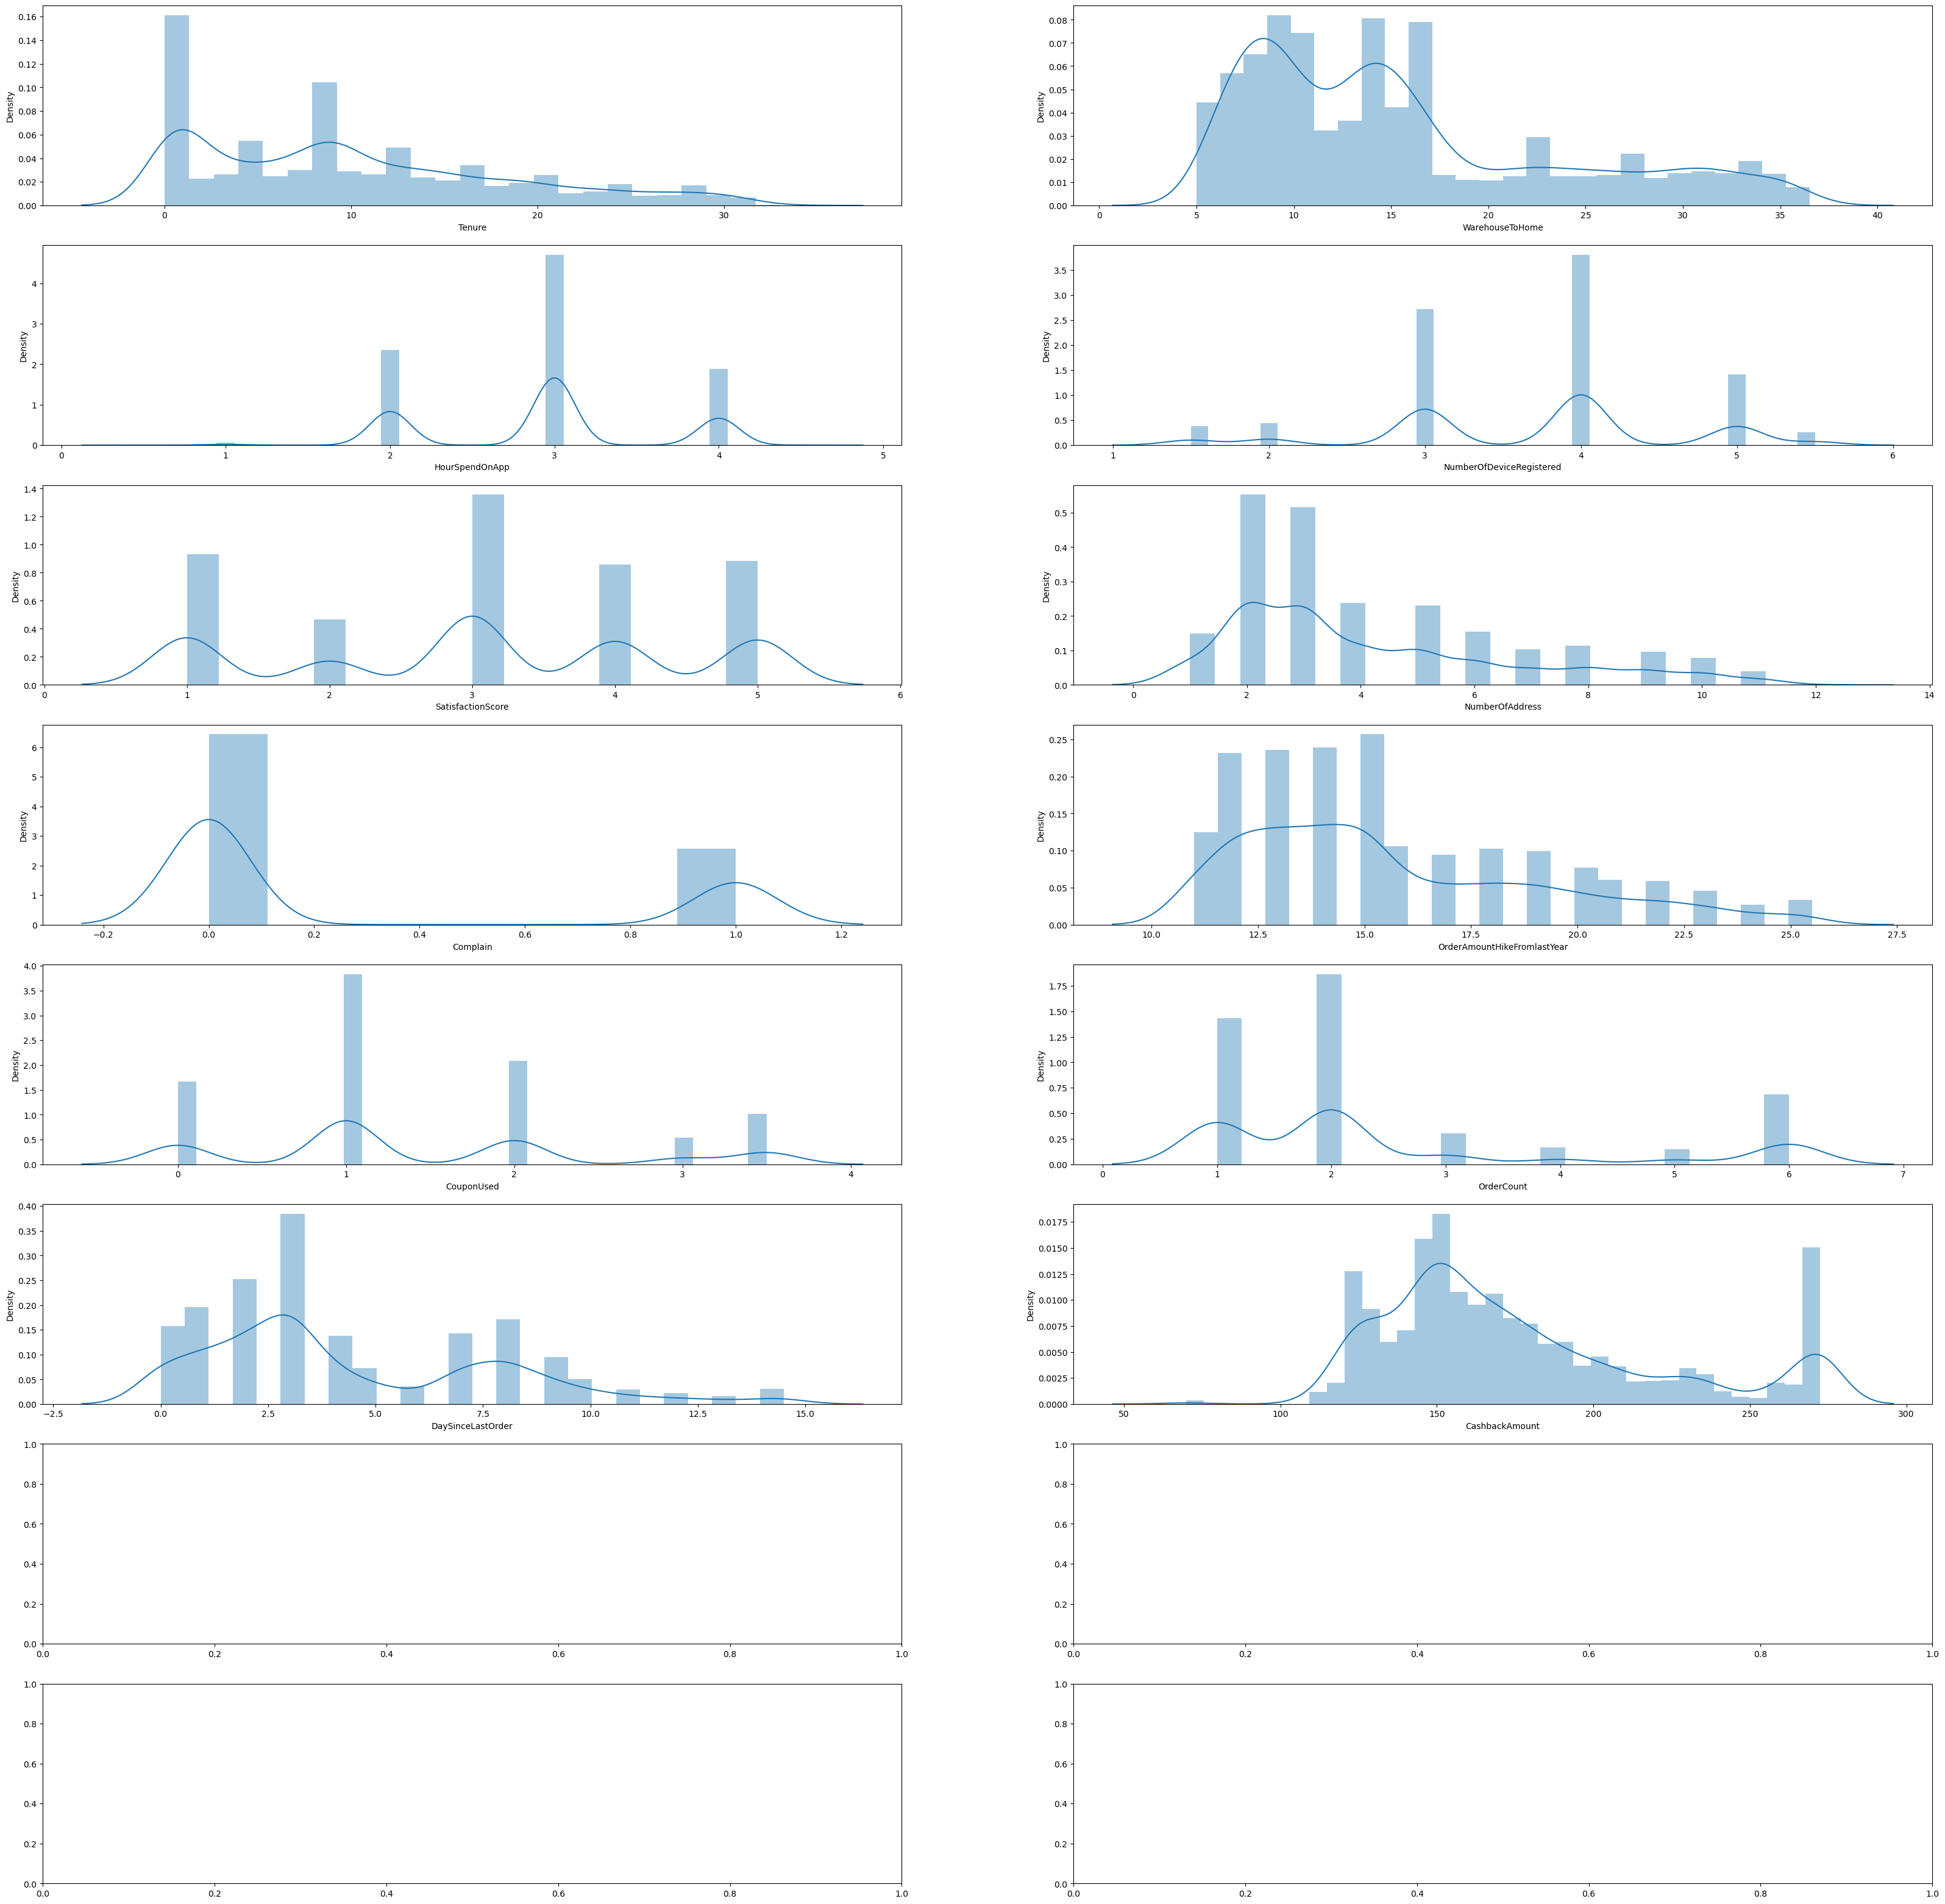

In [31]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num_col, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

In [42]:
# defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.
# this was done so that we can quickly automate making such dataframes

d={}

# running loop for storing the calculating and storing the values in the relevant dataframes  
for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),df.groupby(i).Churn.sum()*100/df[i].value_counts()], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )
    
    
for i in df.columns:
    print(i)
    # print(df.groupby(i).Churn.sum()*100)
    # print(df[i].value_counts())
    # print(df.groupby(i).Churn.sum()*100/df[i].value_counts())
    print(d[i])
    print()

Churn
   Churn Total_Customers Total_Customers Total_Customers
0      0               0            4682             0.0
1      1             948             948           100.0

Tenure
    Tenure Customers_churned  Total_Customers perc_of_total_cust
0      0.0               272              508          53.543307
1      1.0               349              690           50.57971
2      2.0                14              167           8.383234
3      3.0                18              195           9.230769
4      4.0                20              203           9.852217
5      5.0                16              204           7.843137
6      6.0                 8              183           4.371585
7      7.0                16              221           7.239819
8      8.0                16              263            6.08365
9      9.0                93              511          18.199609
10    10.0                14              213            6.57277
11    11.0                10       

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6772\3022001610.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,12))


<Figure size 2000x1200 with 0 Axes>

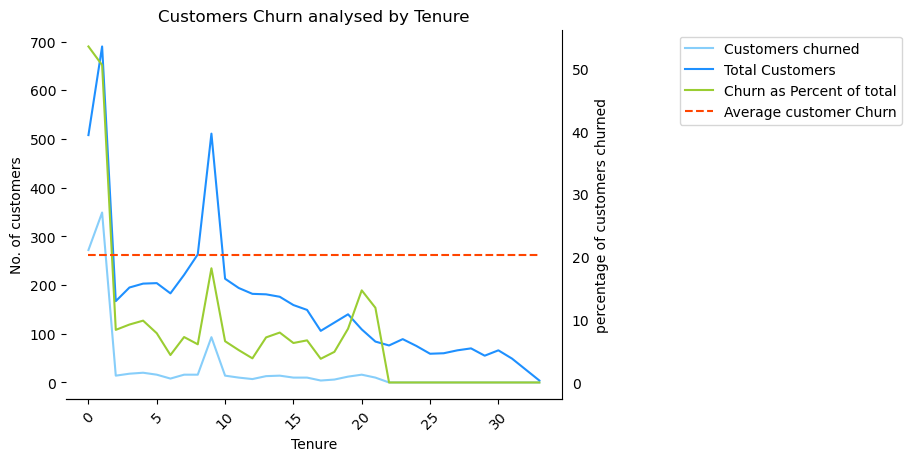

<Figure size 2000x1200 with 0 Axes>

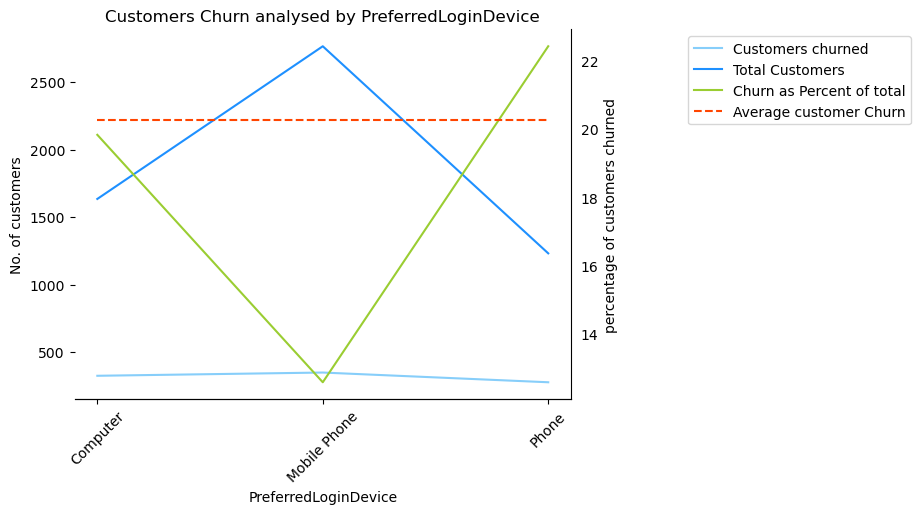

<Figure size 2000x1200 with 0 Axes>

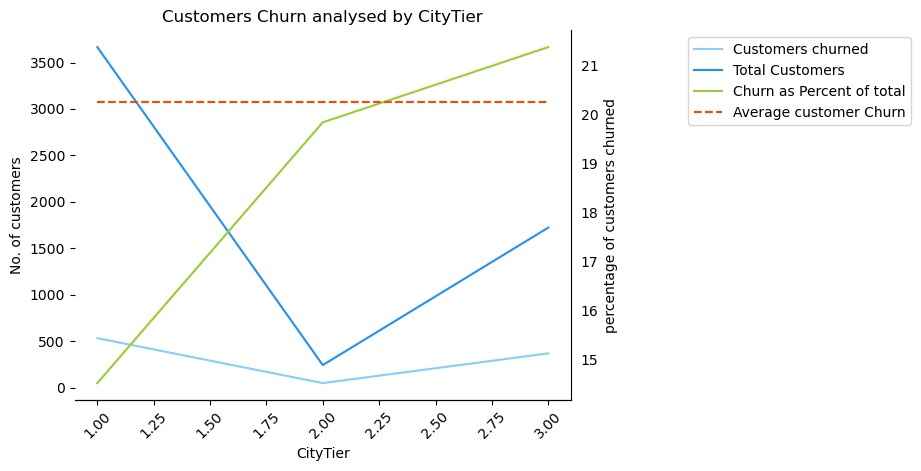

<Figure size 2000x1200 with 0 Axes>

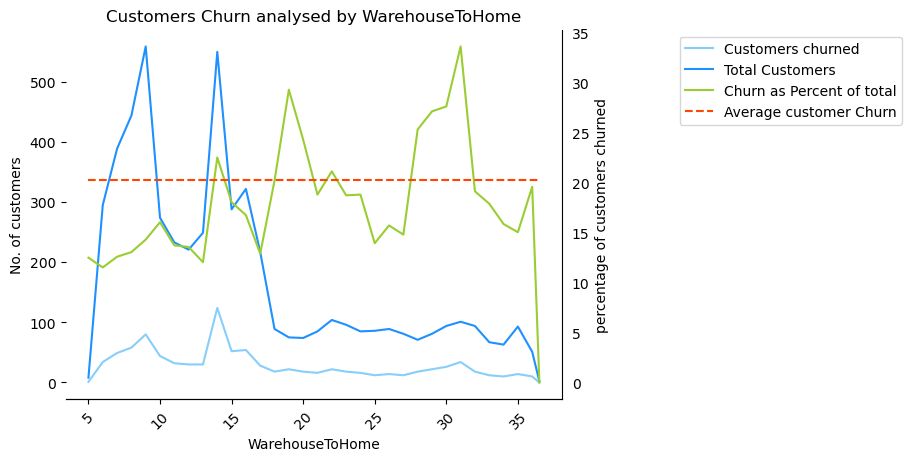

<Figure size 2000x1200 with 0 Axes>

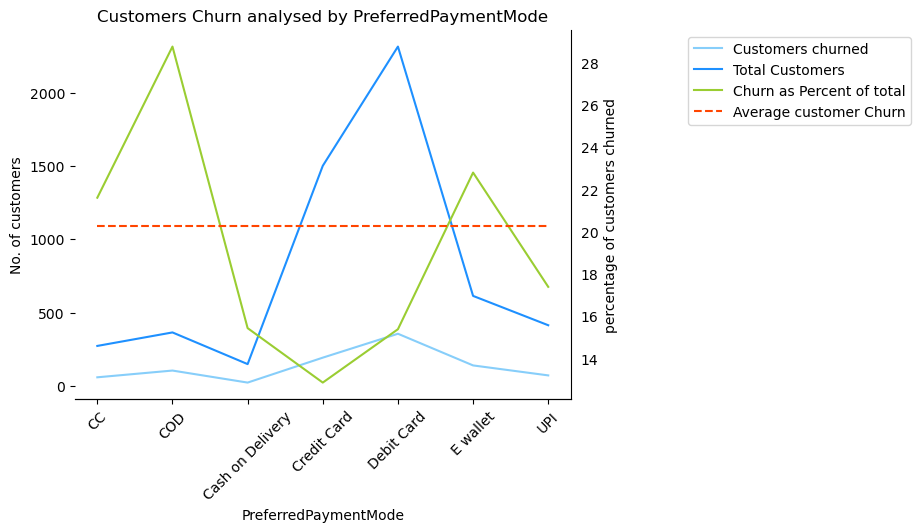

<Figure size 2000x1200 with 0 Axes>

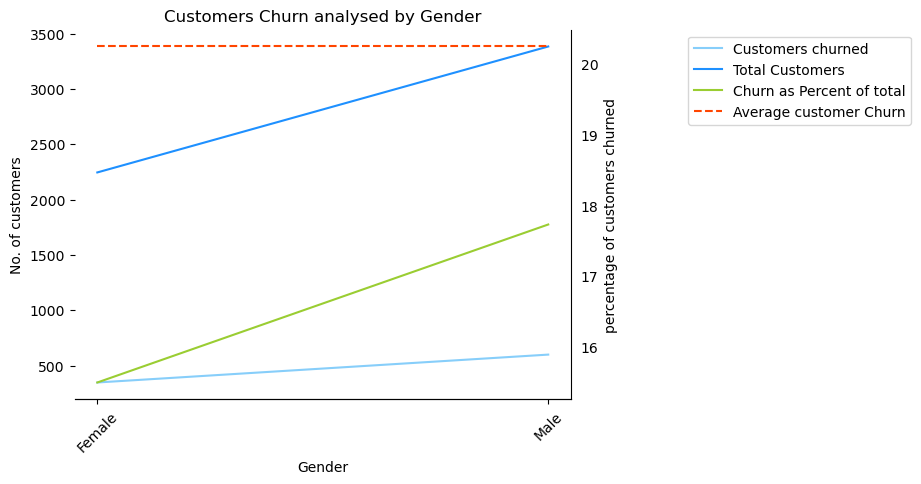

<Figure size 2000x1200 with 0 Axes>

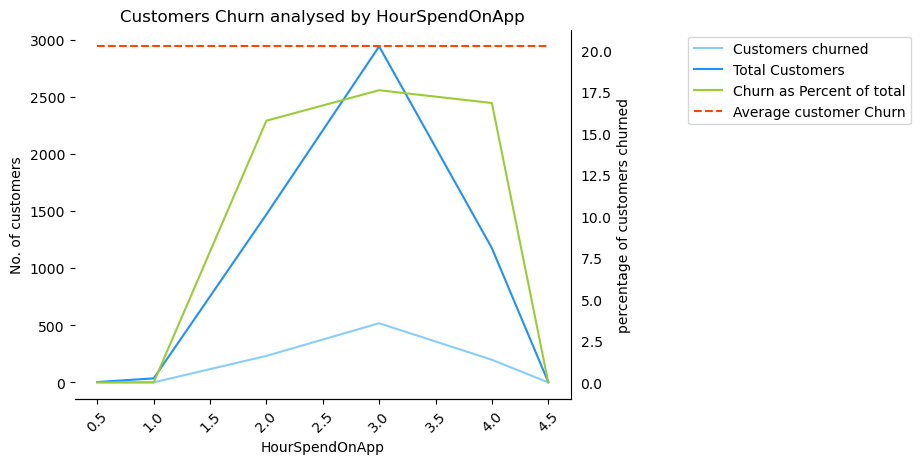

<Figure size 2000x1200 with 0 Axes>

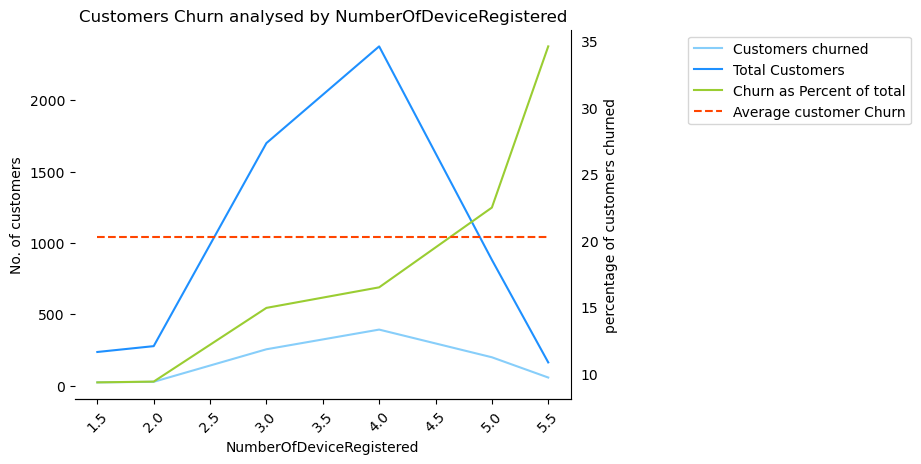

<Figure size 2000x1200 with 0 Axes>

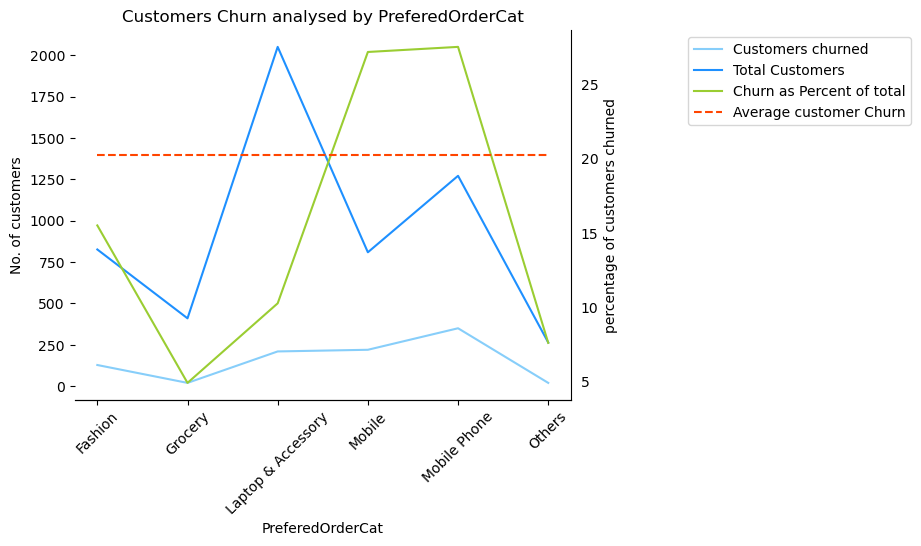

<Figure size 2000x1200 with 0 Axes>

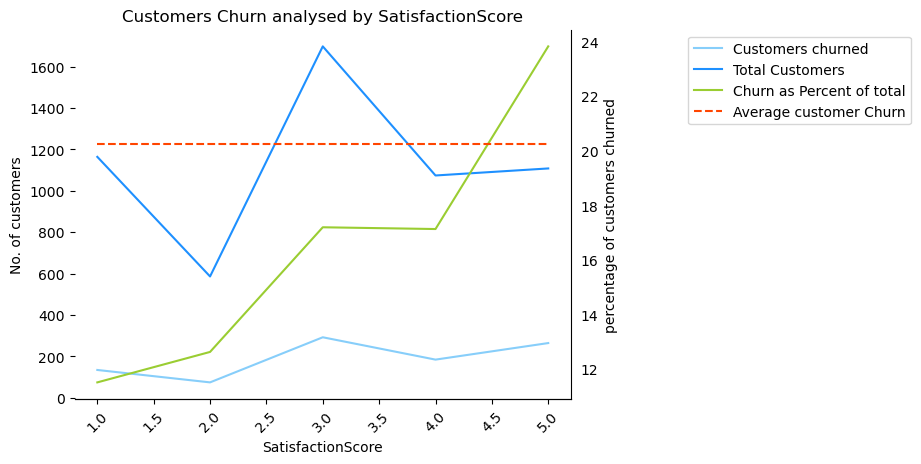

<Figure size 2000x1200 with 0 Axes>

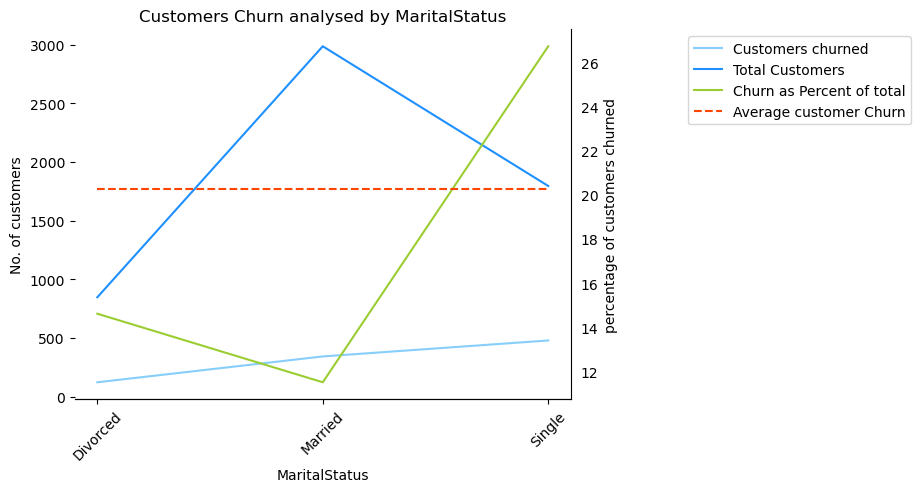

<Figure size 2000x1200 with 0 Axes>

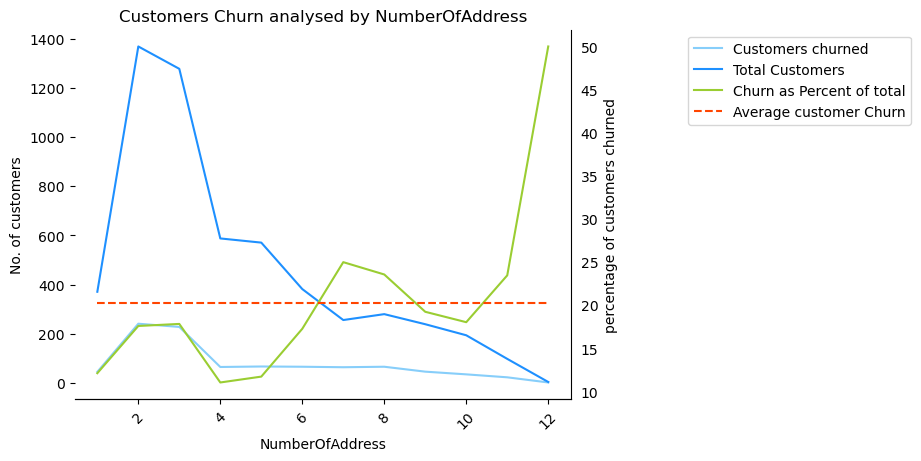

<Figure size 2000x1200 with 0 Axes>

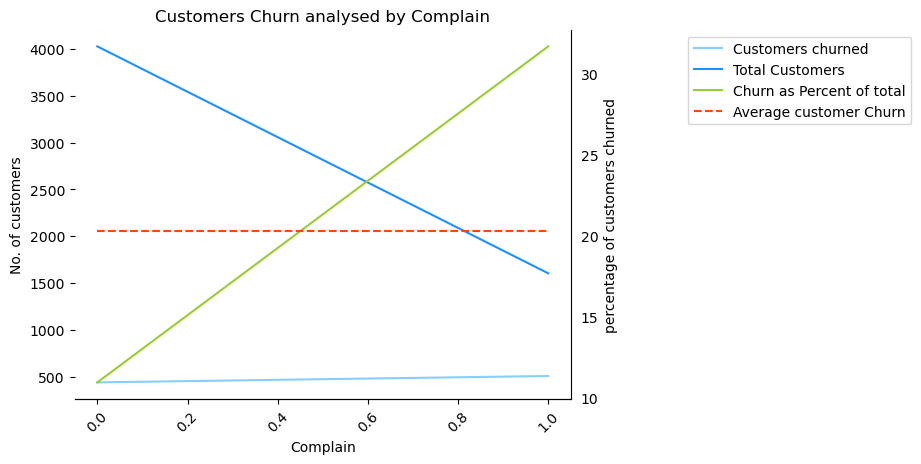

<Figure size 2000x1200 with 0 Axes>

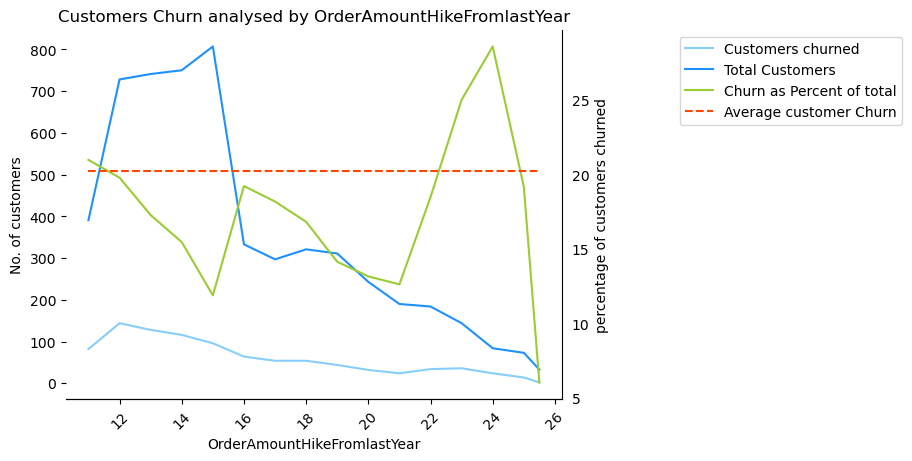

<Figure size 2000x1200 with 0 Axes>

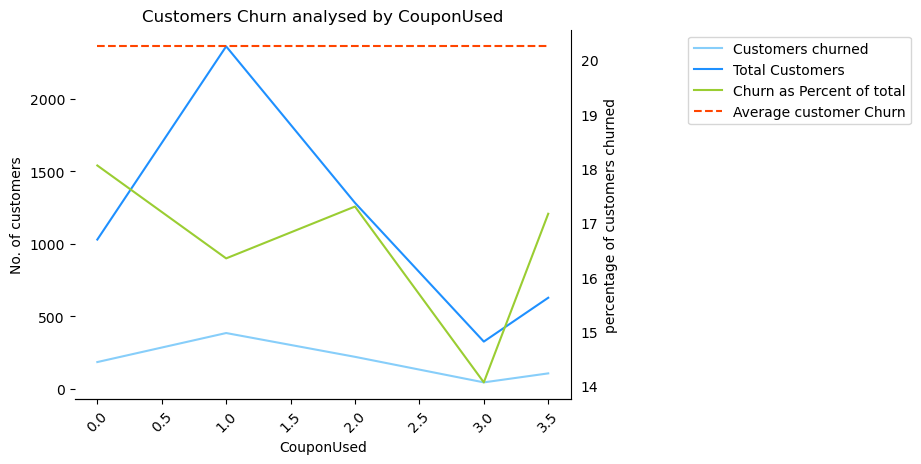

<Figure size 2000x1200 with 0 Axes>

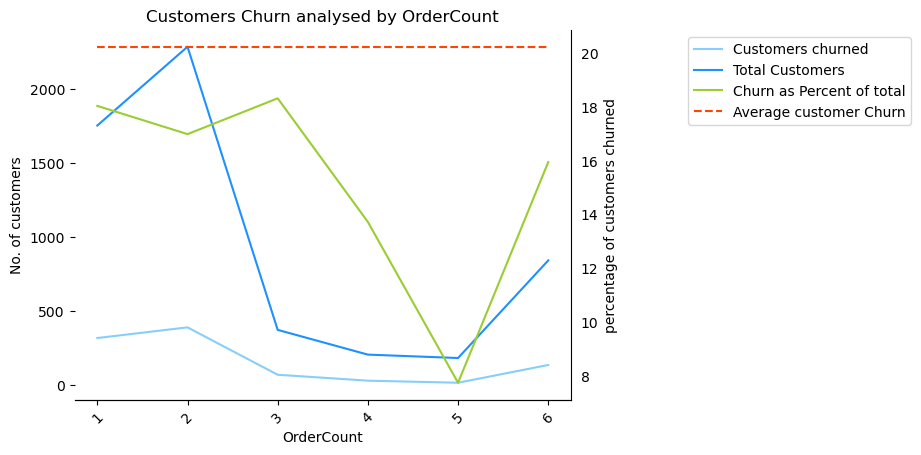

<Figure size 2000x1200 with 0 Axes>

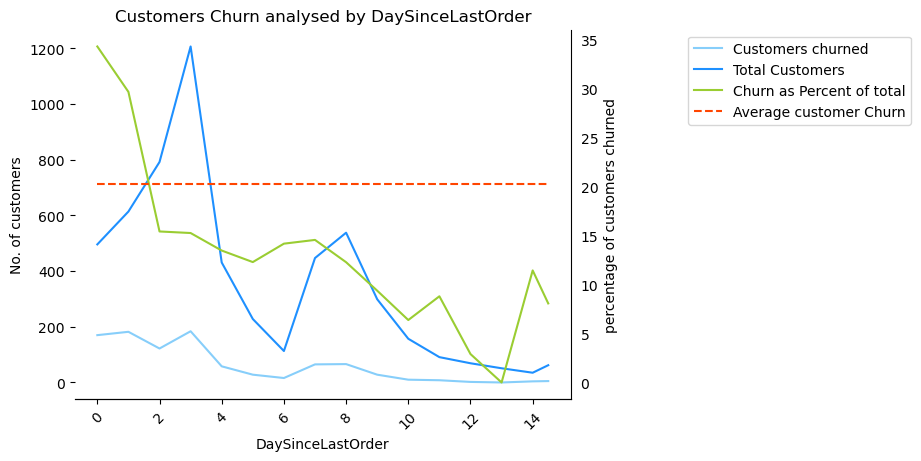

In [43]:
def analysis_chart(variable):
  # definig the plot for matplotlib
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  # defining the title
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  # defining the lines for the y -axis
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  # labelling the x -axis and y-axis
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  # rotating the labels on the x-axis for better visualisation
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  # defining another axis on the right side of the graph
  ax2=ax.twinx()
  # defining the line for the right side y -axis
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  # labelling the right side y-axis
  plt.ylabel ('percentage of customers churned')
  # adding the three lines to show the legend on the right corner in a coherent place, not doing this will lead to overlapping of legends of lines belonging to left and right y axis
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  # adding sns palette for better visualisation
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)

col = ['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

for i in col:
    analysis_chart(i)

<AxesSubplot:>

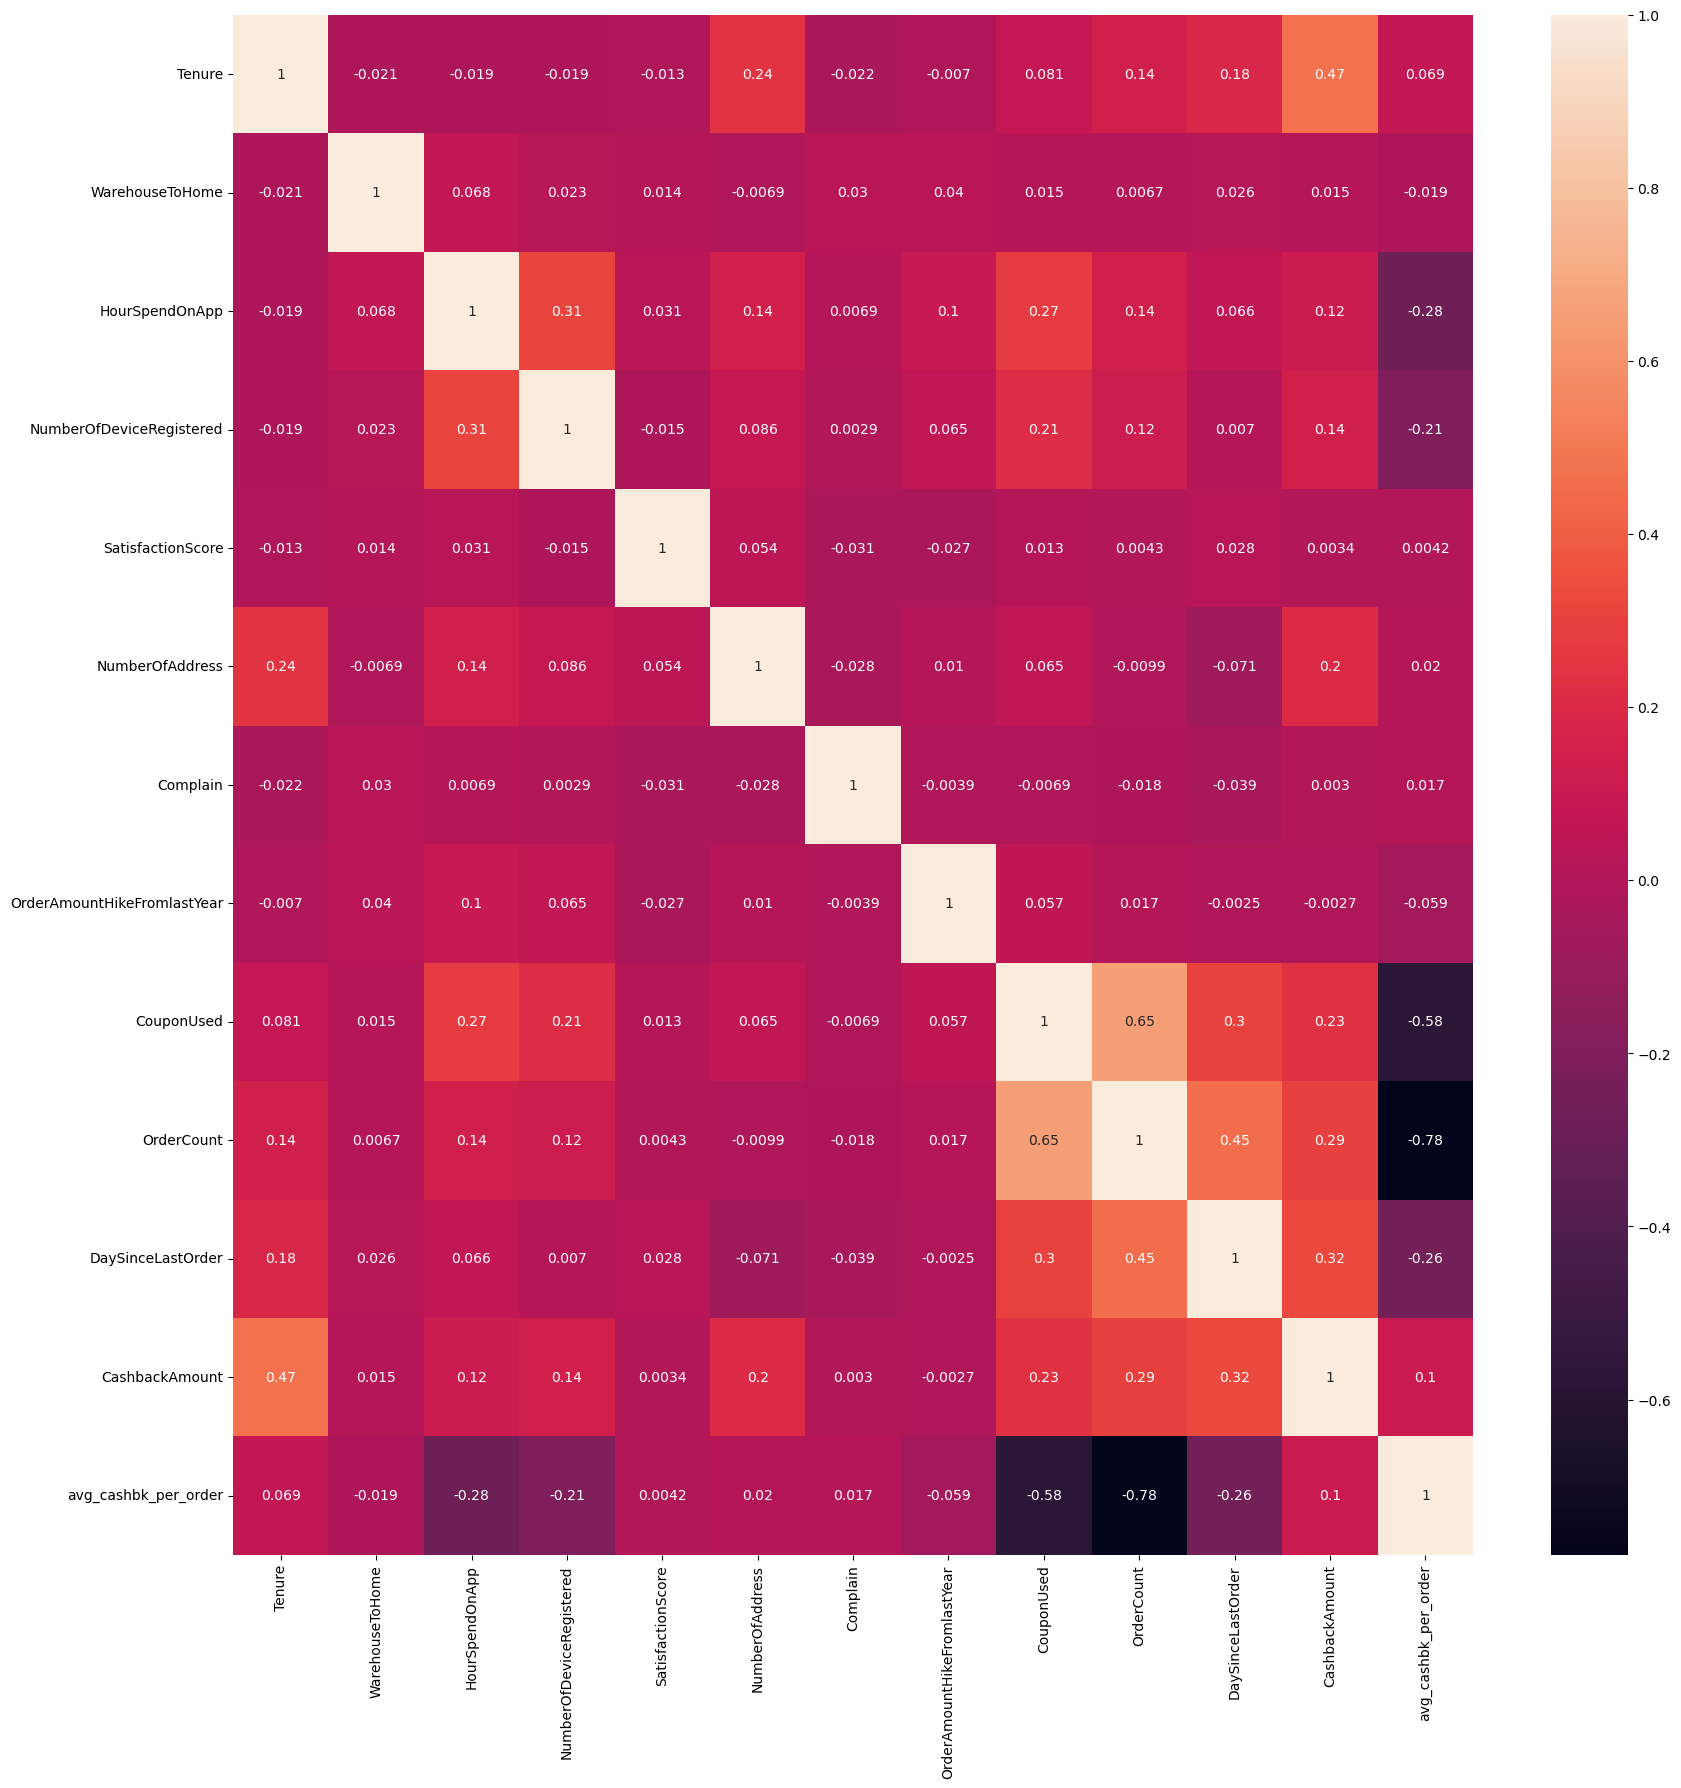

In [44]:
#EDA - Bivariate Analysis
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [48]:
#One Hot coding and Scaling of the data

cate_col.remove('Churn')
df_encoded = pd.get_dummies(df[cate_col], drop_first=True)
df_encoded.head(5)

D:\software\anaconda\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


PreferredLoginDevice_Mobile Phone  PreferredLoginDevice_Phone  CityTier_2  \
0                                  1                           0           0   
1                                  0                           1           0   
2                                  0                           1           0   
3                                  0                           1           0   
4                                  0                           1           0   

   CityTier_3  PreferredPaymentMode_COD  \
0           1                         0   
1           0                         0   
2           0                         0   
3           1                         0   
4           0                         0   

   PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_Credit Card  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   

   PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
0                                1                              0   
1                                0                              0   
2                                1                              0   
3                                1                              0   
4                                0                              0   

   PreferredPaymentMode_UPI  Gender_Male  PreferedOrderCat_Grocery  \
0                         0            0                         0   
1                         1            1                         0   
2                         0            1                         0   
3                         0            1                         0   
4                         0            1                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                    1                        0   
1                                    0                        1   
2                                    0                        1   
3                                    1                        0   
4                                    0                        1   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     1

In [52]:
#importing StandardScaler from SciKit Learn
from sklearn.preprocessing import StandardScaler

#defining a function standard scaler that will scale the the dataframe
scaler = StandardScaler()

df_encode = df.copy()
num_df = df[num_col]
scalered_df = scaler.fit_transform(num_df)
df_encode[num_col] = scalered_df
df_encode

Churn    Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0        1 -0.737959         Mobile Phone        3        -1.178795   
1        1 -0.134866                Phone        1        -0.931534   
2        1 -0.134866                Phone        1         1.788340   
3        1 -1.220433                Phone        3        -0.066119   
4        1 -1.220433                Phone        1        -0.437011   
...    ...       ...                  ...      ...              ...   
5625     0 -0.014247             Computer        1         1.788340   
5626     0  0.347609         Mobile Phone        1        -0.313381   
5627     0 -1.099814         Mobile Phone        1        -0.560642   
5628     0  1.553794             Computer        3        -0.807903   
5629     0 -0.255484         Mobile Phone        1        -0.066119   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female        0.092878                 -0.738345   
1                     UPI    Male        0.092878                  0.323303   
2              Debit Card    Male       -1.328053                  0.323303   
3              Debit Card    Male       -1.328053                  0.323303   
4                      CC    Male        0.092878                 -0.738345   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male        0.092878                 -1.799993   
5626          Credit Card    Male        0.092878                  1.384951   
5627           Debit Card    Male        0.092878                 -1.799993   
5628          Credit Card    Male        1.513809                  1.384951   
5629          Credit Card    Male        0.092878                 -1.799993   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory          -0.772992        Single         1.875626   
1                 Mobile          -0.048392        Single         1.092812   
2                 Mobile          -0.048392        Single         0.701405   
3     Laptop & Accessory           1.400807        Single         1.484219   
4                 Mobile           1.400807        Single        -0.472817   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory          -1.497592       Married         0.701405   
5626             Fashion           1.400807       Married         0.701405   
5627  Laptop & Accessory           0.676207       Married        -0.472817   
5628  Laptop & Accessory           0.676207       Married        -0.081410   
5629  Laptop & Accessory          -0.048392       Married        -0.081410   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0     1.584290                    -1.304023   -0.411136   -0.888745   
1     1.584290                    -0.187486   -1.344668   -0.888745   
2     1.584290                    -0.466620   -1.344668   -0.888745   
3    -0.631198                     2.045589   -1.344668   -0.888745   
4    -0.631198                    -1.304023   -0.411136   -0.888745   
...        ...                          ...         ...         ...   
5625 -0.631198                     0.649917   -0.411136   -0.304276   
5626 -0.631198                     0.091648   -0.411136   -0.304276   
5627  1.584290                     1.487320   -0.411136   -0.304276   
5628 -0.631198                    -0.187486    0.522397   -0.304276   
5629 -0.631198                    -0.745755    0.522397   -0.304276   

      DaySinceLastOrder  CashbackAmount  avg_cashbk_per_order  
0              0.166005       -0.349346               159.930  
1             -1.287958       -1.235064               120.900  
2             -0.415580       -1.249134               120.280  
3             -0.415580       -0.936194               134.070  
4             -0.415580       -1.037633               129.600  
...                 ...      

In [54]:
df_model = pd.concat([df_encode[num_col], df_encoded, df['Churn']], axis=1)

In [55]:
#K-means
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn import cluster

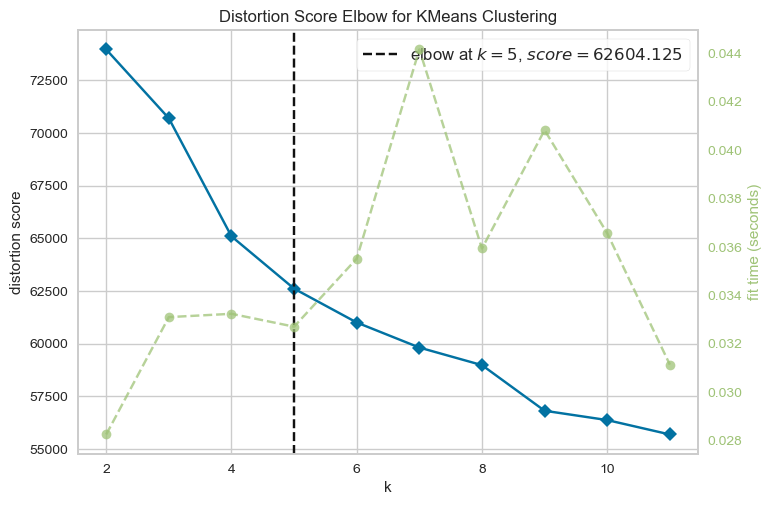

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
# 手肘法确定K值
%matplotlib inline
Elbow = KElbowVisualizer(KMeans(),k=(2,12))
Elbow.fit(df_model)
Elbow.show()

In [58]:
# 聚类，k=5
k_means_result = KMeans(5).fit_predict(df_model)
k_re = pd.DataFrame(k_means_result,columns=['clusters'])
new_df = pd.concat((df_model,k_re),axis=1)
new_df.head()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0 -0.737959        -1.178795        0.092878                 -0.738345   
1 -0.134866        -0.931534        0.092878                  0.323303   
2 -0.134866         1.788340       -1.328053                  0.323303   
3 -1.220433        -0.066119       -1.328053                  0.323303   
4 -1.220433        -0.437011        0.092878                 -0.738345   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0          -0.772992         1.875626  1.584290                    -1.304023   
1          -0.048392         1.092812  1.584290                    -0.187486   
2          -0.048392         0.701405  1.584290                    -0.466620   
3           1.400807         1.484219 -0.631198                     2.045589   
4           1.400807        -0.472817 -0.631198                    -1.304023   

   CouponUsed  OrderCount  ...  Gender_Male  PreferedOrderCat_Grocery  \
0   -0.411136   -0.888745  ...            0                         0   
1   -1.344668   -0.888745  ...            1                         0   
2   -1.344668   -0.888745  ...            1                         0   
3   -1.344668   -0.888745  ...            1                         0   
4   -0.411136   -0.888745  ...            1                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile  \
0                                    1                        0   
1                                    0                        1   
2                                    0                        1   
3                                    1                        0   
4                                    0                        1   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   MaritalStatus_Married  MaritalStatus_Single  Churn  clusters  
0                      0                     1      1         2  
1                      0                     1      1         2  
2                      0                     1      1         2  
3                      0                     1      1         4  
4                      0                     1      1         4  

[5 rows x 32 columns]

D:\software\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution Of The Clusters')

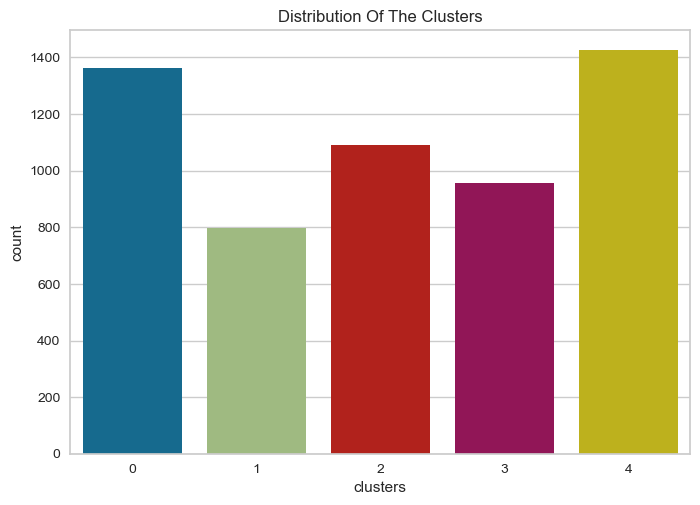

In [60]:
sns.countplot(new_df['clusters']).set_title("Distribution Of The Clusters")

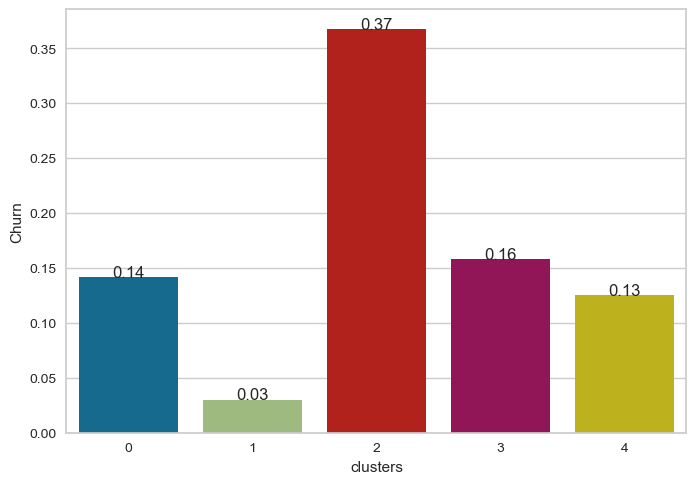

In [64]:
df_churn = new_df.groupby(['clusters'],as_index=False)['Churn'].mean()
sns.barplot(x='clusters',y='Churn',data=df_churn)
for x,y in zip(df_churn['clusters'],df_churn['Churn']):
    plt.text(x=x,y=y,s='{:.02f}'.format(y),ha='center')